### Output variable -> y
### y -> Whether the client has subscribed a term deposit or not 
### Binomial ("yes" or "no")


# 1. importing libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 2. Importing data

In [3]:
bank_data=pd.read_csv("bank-full.csv",sep=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# 3. Data understanding 

#####  Analysis

In [4]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# 4. Data Preparation

#### changing the columns containing yes or no to  0 and 1

In [8]:
col = ['default','housing','loan','y']
def convert(x):
    return x.map({'yes':1,'no':0})
bank_data[col] = bank_data[col].apply(convert)

In [9]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,0,121,1,0,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,0,593,1,0,unknown,5,may,55,1,-1,0,unknown,0


In [10]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

#### Convert categorical variable into dummy/indicator variables,these object data will be converted to int

In [11]:
object_data = bank_data.select_dtypes(include=['object'])
object_data.head()

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,unknown,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown


In [12]:
dummies = pd.get_dummies(object_data,drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [13]:
bank_data = pd.concat([bank_data,dummies],axis=1)
bank_data.drop(columns=object_data.columns,axis=1,inplace=True)

In [14]:
bank_data.head(30)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
5,35,0,231,1,0,5,139,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
6,28,0,447,1,1,5,217,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
7,42,1,2,1,0,5,380,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
8,58,0,121,1,0,5,50,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
9,43,0,593,1,0,5,55,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [15]:
bank_data.shape

(45211, 43)

In [18]:
continuous_data = bank_data[['age','balance','day','duration','campaign','pdays','previous']]
continuous_data.head(100)

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
95,36,101,5,426,1,-1,0
96,55,383,5,287,1,-1,0
97,60,81,5,101,1,-1,0
98,39,0,5,203,1,-1,0


### checking for outliers

<AxesSubplot:ylabel='previous'>

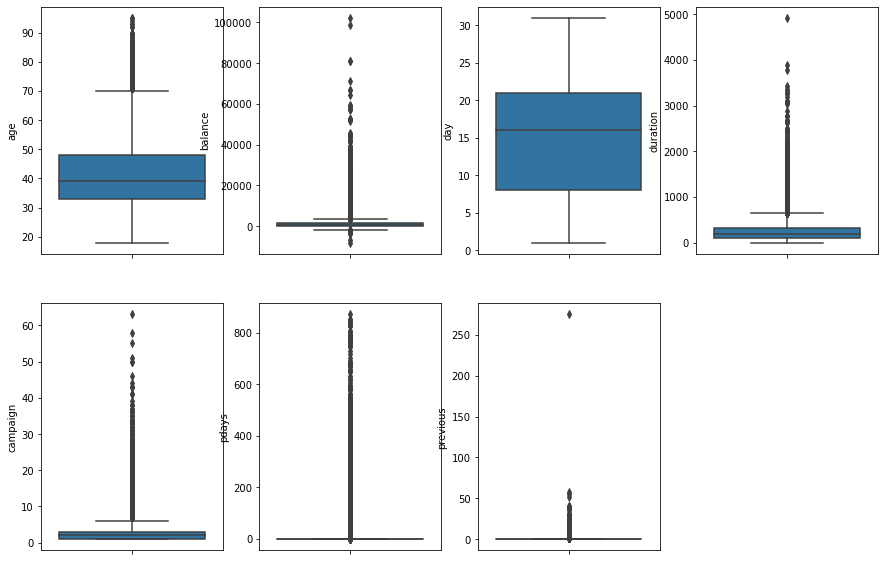

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=bank_data)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=bank_data)
plt.subplot(2,4,3)
sns.boxplot(y='day',data=bank_data)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=bank_data)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data=bank_data)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data=bank_data)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data=bank_data)

### checking for correlation

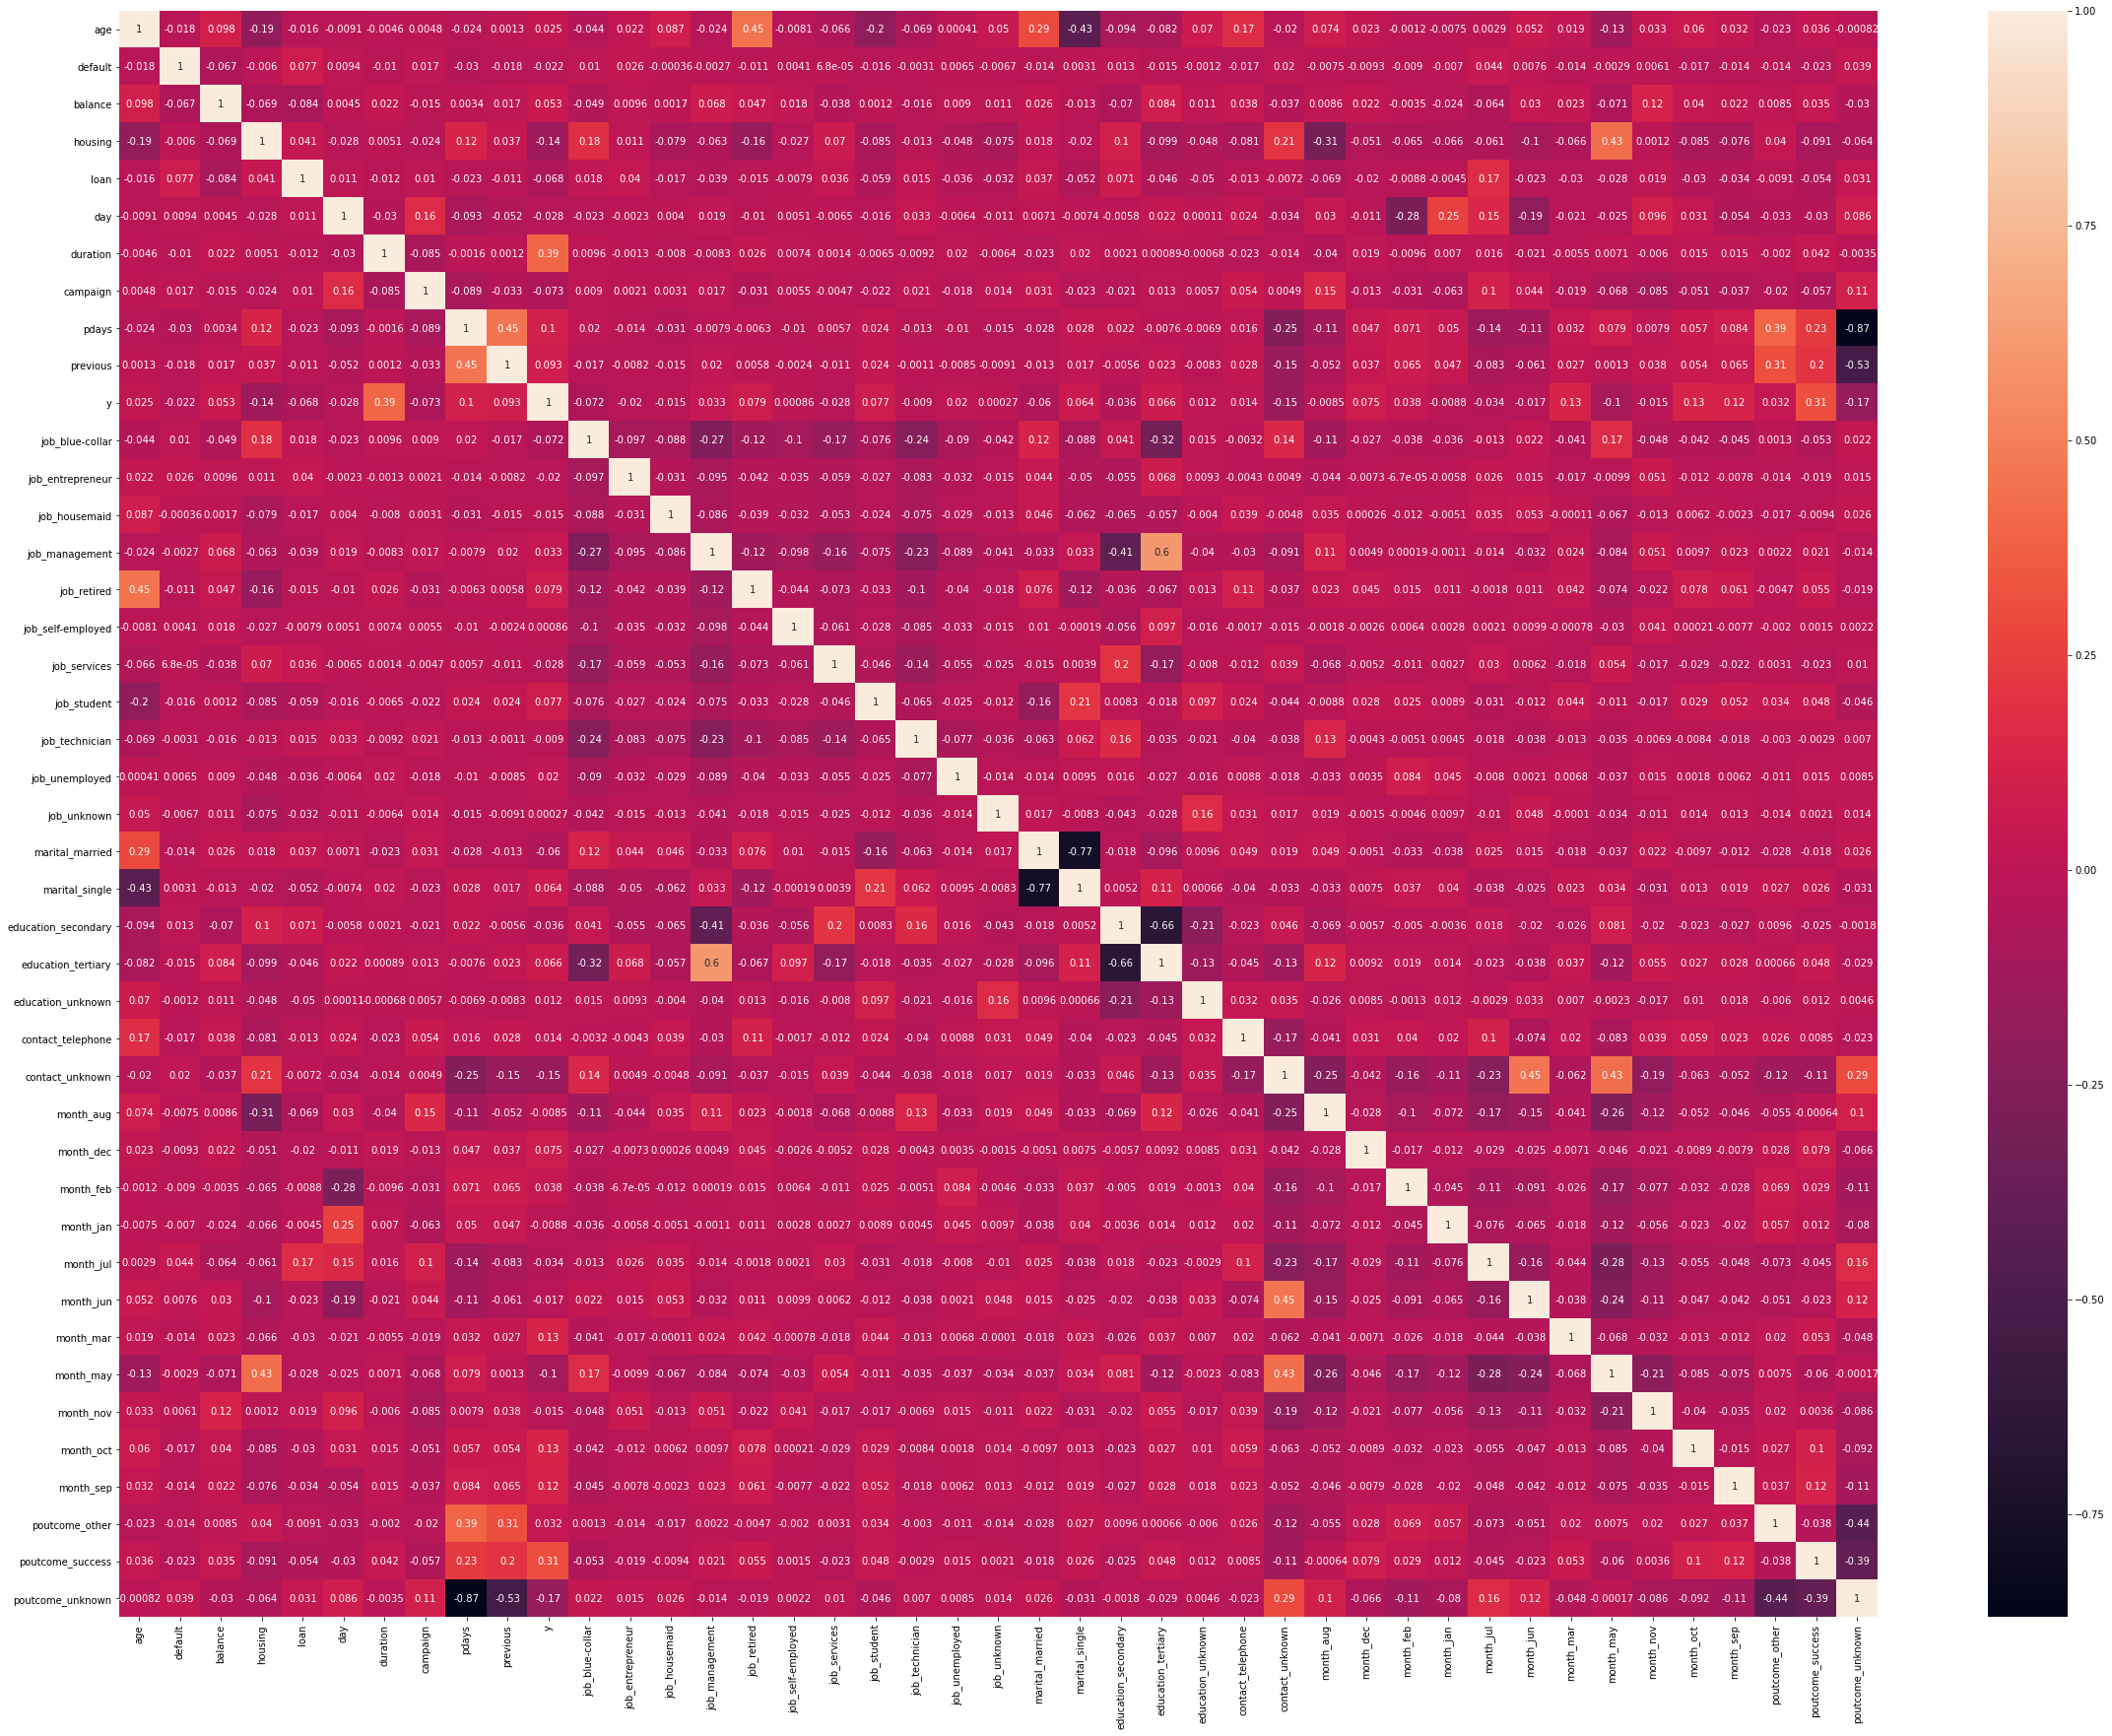

In [25]:
plt.figure(figsize=(40,30))
sns.heatmap(bank_data.corr(),annot=True)
plt.show()

In [26]:
X = bank_data.drop(['y'],1) # independent variables
Y = bank_data['y'] # dependent variables

In [27]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [28]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

# 5. Training and Testing model

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

# 6. Feature Scaling

In [32]:
scaler = StandardScaler()
X_train[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(X_train[['age','balance','day','duration','campaign','pdays','previous']])

<ipython-input-32-a8f5916e93f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(X_train[['age','balance','day','duration','campaign','pdays','previous']])
C:\Users\vinay\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


# 7. Model Building

In [36]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [37]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

In [41]:
accuracy_score(y_train,y_train_pred)

0.9024828577748286

In [42]:
confusion_matrix(y_train,y_train_pred)

array([[31180,   777],
       [ 2750,  1461]], dtype=int64)

In [43]:
precision_score(y_train,y_train_pred)

0.6528150134048257

In [44]:
recall_score(y_train,y_train_pred)

0.34694846829731657

In [45]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     31957
           1       0.65      0.35      0.45      4211

    accuracy                           0.90     36168
   macro avg       0.79      0.66      0.70     36168
weighted avg       0.89      0.90      0.89     36168



In [52]:
accuracy_score(y_test,y_test_pred)

0.12318920712153046

In [53]:
confusion_matrix(y_test,y_test_pred)

array([[  36, 7929],
       [   0, 1078]], dtype=int64)

In [55]:
print(classification_report(y_test,y_test_pred)) # overfitting

              precision    recall  f1-score   support

           0       1.00      0.00      0.01      7965
           1       0.12      1.00      0.21      1078

    accuracy                           0.12      9043
   macro avg       0.56      0.50      0.11      9043
weighted avg       0.90      0.12      0.03      9043



# 8. Model Deployment

In [56]:
from pickle import dump

In [57]:
dump(log_reg,open('Logistic_Model.pkl','wb'))

In [58]:
from pickle import load

In [59]:
logistic_model_pickle = load(open('Logistic_Model.pkl','rb')) 

In [60]:
pickle_pred = logistic_model_pickle.predict(X_test)

In [61]:
pickle_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)